# 라이브러리 설치

In [ ]:
# 사운드 처리 라이브러리
!pip install librosa

In [19]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

# 각자의 구글 드라이브 폴더로 변경
data_dir = "/content/drive/MyDrive/Colab Notebooks/사물지능_딥러닝_2022/data/"

# 소리 데이터 읽기
# wav : 소리 데이터
# sr : sampling rate (초당 데이터 수)
wav, sr = librosa.load(data_dir + "모차르트_자장가_반주.wav")

# 소리 데이터 정보 출력
print(sr)
print(wav.shape)
print(wav.shape[0] / float(sr))

# 총 67253개의 데이터로 구성되어 있고 초당 22050 개의 데이터로 구성

22050
(3469200,)
157.33333333333334


In [7]:
# 소리 데이터 플레이
IPython.display.Audio(data=wav, rate=sr)

Text(0, 0.5, 'AMP')

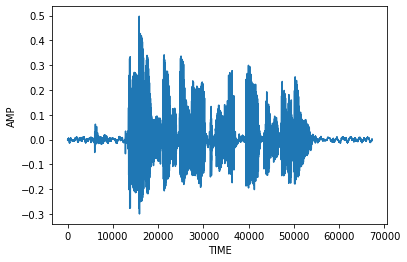

In [9]:
# 소리 데이터 시각화
plt.plot(wav)
plt.xlabel("TIME")
plt.ylabel("AMP")

Text(0, 0.5, 'AMP')

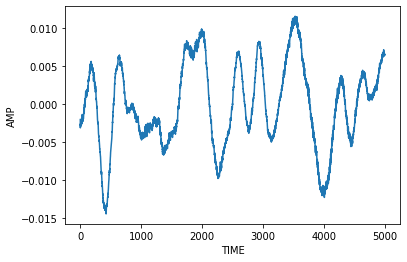

In [11]:
# 일부 시간축 데이터만 출력
plt.plot(wav[:5000])
plt.xlabel("TIME")
plt.ylabel("AMP")

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=30
  n_fft, y.shape[-1]


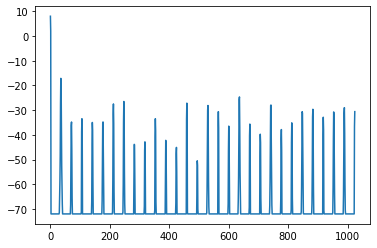

In [15]:
# 주파수 영역으로 변환 (FT : Fourier 변환)
dB = librosa.amplitude_to_db(np.abs(librosa.stft(wav[:30])))

plt.plot(dB.flatten())

- Melspectrum : 소리데이터를 샘플링할 때 저주파부분은 샘플링 간격을 짧게하고 고주파 부분은 길게 함 - 사람 귀가 소리를 듣는 특성을 반영
  - 소리 데이터가 이미지 데이터로 변환

- MFCC : Melspectrum을 디지털로 변환한 것

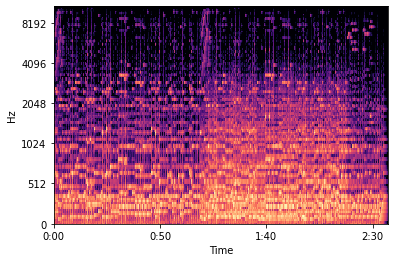

In [20]:
# n_mels : 멜 스펙트럼의 수 (세로축의 눈금 수)
# 시간별 소리의 크기, 주파수 성분을 시각화
S = librosa.feature.melspectrogram(wav, sr=sr, n_mels=128)

# 시각화
log_S = librosa.power_to_db(S, ref = np.max)
librosa.display.specshow(log_S, sr=sr, x_axis="time", y_axis="mel")